## Finding Your Way In The City

In this notebook you'll combine the work of previous exercises to calculate a minimal series of waypoints in order to get from a start location to a goal location.

You'll reuse and modify your algorithms from:

- A*
- Configuration Space
- Collinearity and/or Bresenham

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from planning import a_star

%matplotlib inline

#from bresenham import bresenham

In [3]:
plt.rcParams['figure.figsize'] = 12, 12

You'll notice we've imported `create_grid`, and `a_star`. These are functions you've implemented in previous exercises, and here you'll use them to create a map and find a path from a starting position to a goal position.

To read the function signature and documentation execute `?` followed by the function name in a cell. In the example below we'll check the documentation for `create_grid`.

In [4]:
?create_grid

Signature: create_grid(data, drone_altitude, safety_distance)
Docstring:
Returns a grid representation of a 2D configuration space
based on given obstacle data, drone altitude and safety distance
arguments.
File:      ~/udacity_FlyingCar/planning/grid.py
Type:      function


If you would like to alter these implementations, you can modify [grid.py](/edit/grid.py) and [planning.py](/edit/planning.py) in the current directory.

In [5]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [6]:
# Static drone altitude (meters)
drone_altitude = 5

# Minimum distance stay away from obstacle (meters)
safe_distance = 3

In [7]:
# TODO: Use `create_grid` to create a grid configuration space of
# the obstacle data.
grid = create_grid(data, drone_altitude, safe_distance)

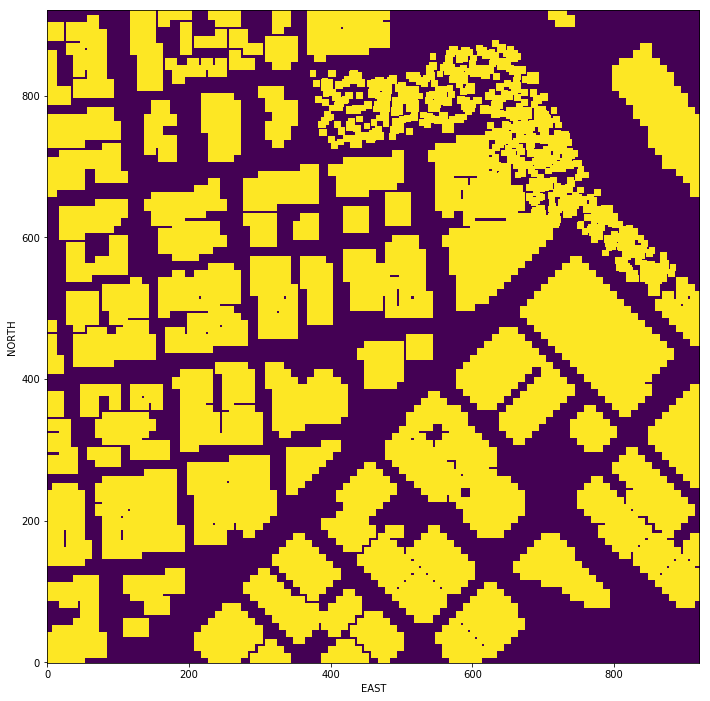

In [8]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Next you'll compute the path from a start location to a goal location using A*.

Start and goal coordinates in *(north, east)*.

In [9]:
start_ne = (25,  100)
goal_ne = (750., 370.)

Write a heuristic function.

In [10]:
def heuristic_func(position, goal_position):
    # TODO: write a heuristic!
    h = abs(position[0]-goal_position[1]) + abs(position[1] - goal_position[1])
    return h

Compute the lowest cost path with `a_star`. 

In [11]:
?a_star

Signature: a_star(grid, h, start, goal)
Docstring: <no docstring>
File:      ~/udacity_FlyingCar/planning/planning.py
Type:      function


In [12]:
# TODO: use `a_star` to compute the lowest cost path
path, cost = a_star(grid, heuristic_func, start_ne, goal_ne)
#print(path, cost)

Found a path.
[(25, 100), (25, 101), (25, 102), (25, 103), (25, 104), (25, 105), (25, 106), (25, 107), (25, 108), (25, 109), (25, 110), (25, 111), (25, 112), (25, 113), (25, 114), (25, 115), (25, 116), (25, 117), (25, 118), (25, 119), (25, 120), (25, 121), (25, 122), (25, 123), (25, 124), (25, 125), (25, 126), (25, 127), (25, 128), (25, 129), (25, 130), (25, 131), (25, 132), (25, 133), (25, 134), (25, 135), (25, 136), (25, 137), (25, 138), (25, 139), (25, 140), (25, 141), (25, 142), (25, 143), (25, 144), (25, 145), (25, 146), (25, 147), (25, 148), (25, 149), (25, 150), (25, 151), (25, 152), (25, 153), (25, 154), (25, 155), (25, 156), (25, 157), (25, 158), (25, 159), (25, 160), (25, 161), (25, 162), (25, 163), (25, 164), (25, 165), (25, 166), (25, 167), (25, 168), (25, 169), (25, 170), (25, 171), (25, 172), (25, 173), (25, 174), (25, 175), (25, 176), (25, 177), (25, 178), (25, 179), (25, 180), (25, 181), (25, 182), (25, 183), (25, 184), (25, 185), (25, 186), (25, 187), (25, 188), (25, 1

Let's plot the path!

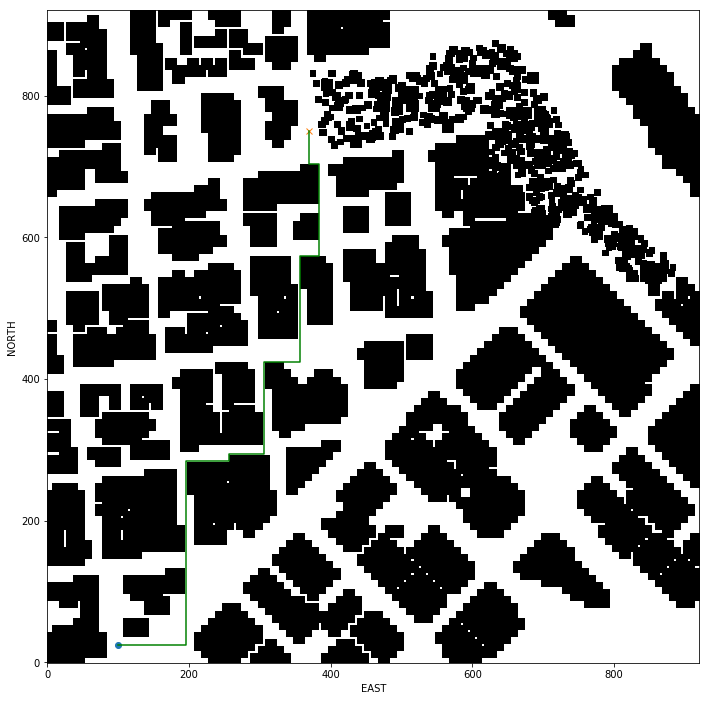

In [14]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'o')
plt.plot(goal_ne[1], goal_ne[0], 'x')

if path is not None:
    pp = np.array(path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Pretty neat! Unfortunately this path is impractical, the drone would be constantly stopping and going since each grid cell visited is synonymous with a waypoint. Ideally, we'd like to only consider a new waypoint when the drone's direction changes. Path pruning is one way to achieve this result.

### Path Pruning

In [15]:
def point(p):
    return np.array([p[0], p[1], 1.]).reshape(1, -1)

def collinearity_check(p1, p2, p3, epsilon=1e-6):   
    m = np.concatenate((p1, p2, p3), 0)
    det = np.linalg.det(m)
    return abs(det) < epsilon

Complete the `prune_path` function below. It should return a new path much shorter than the original.

In [16]:
def prune_path(path):
    if path is not None:
        pruned_path = [p for p in path]
        # TODO: prune the path!
        i = 0 
        while i < len(pruned_path) - 2:
            p1 = point(pruned_path[i])
            p2 = point(pruned_path[i+1])
            p3 = point(pruned_path[i+2]) 
            if collinearity_check(p1, p2, p3):
                pruned_path.remove(pruned_path[i+1])
            else:
                i += 1             
    else:
        pruned_path = path
        
    return pruned_path

Prune the path.

In [17]:
pruned_path = prune_path(path)
print(pruned_path)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:
pruned_path

Replot the path, it will be the same as before but the drone flight will be much smoother.

In [ ]:
plt.imshow(grid, cmap='Greys', origin='lower')

plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

if pruned_path is not None:
    pp = np.array(pruned_path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])

plt.xlabel('EAST')
plt.ylabel('NORTH')

plt.show()

Now the waypoints symbolize a change in direction, much better!

[solution](/notebooks/A-Star-City-Solution.ipynb)